# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Home Country of Guests](#3.5.1_3.5.1_home_country_of_guests)
    * [3.5.2 Feature Correlation](#3.5.2_feature_correlation)
      * [3.5.2.1 Feature correlation heatmap](#3.5.2.1_Feature_correlation_heatmap)
      * [3.5.2.2 Scatterplots of numeric features against room price](#3.5.2.2_Scatterplots_of_numeric_features_against_room_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling hotel price.

## 3.3 Imports<a id='3.3_Imports'></a>

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [87]:
hotel_data = pd.read_csv('../data/guests_summary.csv')

In [88]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75042 entries, 0 to 75041
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75042 non-null  object 
 1   is_canceled                     75042 non-null  int64  
 2   lead_time                       75042 non-null  int64  
 3   arrival_date_year               75042 non-null  int64  
 4   arrival_date_month              75042 non-null  object 
 5   arrival_date_week_number        75042 non-null  int64  
 6   arrival_date_day_of_month       75042 non-null  int64  
 7   stays_in_weekend_nights         75042 non-null  int64  
 8   stays_in_week_nights            75042 non-null  int64  
 9   adults                          75042 non-null  int64  
 10  children                        75042 non-null  float64
 11  babies                          75042 non-null  int64  
 12  meal                            

In [89]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Home Country of Guests<a id='3.5.1_home_country_of_guests'></a>

In [90]:
#from the country code to get the country name
online_data = pd.read_html("https://laendercode.net/en/3-letter-list.html")
onlinedata = online_data[0]
online_data =  onlinedata.rename(columns = {'ISO 3166 ALPHA-3':'country', 'Country':'Country_Name'})
online_data

,country,Country_Name
0,AFG,Afghanistan
1,ALA,Aland Islands
2,ALB,Albania
3,DZA,Algeria
4,ASM,American Samoa
...,...,...
247,WLF,Wallis and Futuna
248,ESH,Western Sahara
249,YEM,Yemen
250,ZMB,Zambia


In [91]:
country_data = hotel_data.merge(online_data, on="country", how='left', indicator=True)
country_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,Country_Name,_merge
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,Portugal,both
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,Portugal,both
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,United Kingdom,both
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,United Kingdom,both
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,United Kingdom,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75037,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,Belgium,both
75038,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,France,both
75039,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,Germany,both
75040,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,United Kingdom,both


In [92]:
# get number of acutal guests by country
country_data_new = pd.DataFrame(country_data.loc[country_data["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data_new.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data_new["Number of Guests"].sum()
country_data_new["Guests in %"] = round(country_data_new["Number of Guests"] / total_guests * 100, 2)
country_data_new["country"] = country_data_new.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data_new,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [93]:
guest_map = px.choropleth(country_data_new,
                    locations=country_data_new.index,
                    color=country_data_new["Guests in %"], 
                    hover_name=country_data_new.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show()

### 3.5.2 Feature Correlation<a id='3.5.2_feature_correlation'></a>

#### 3.5.2.1 Feature correlation heatmap<a id='3.5.2.1_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

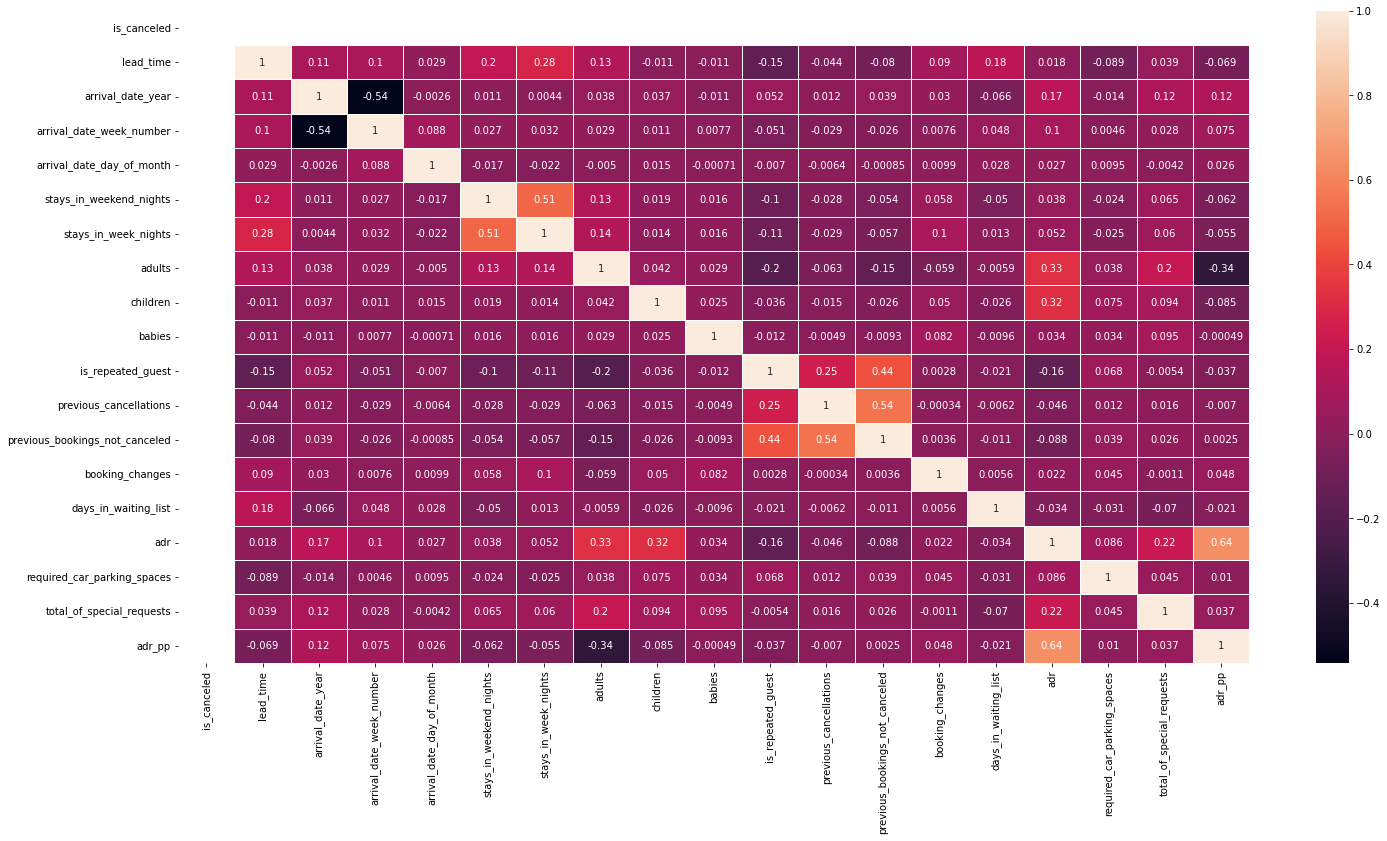

In [94]:
plt.figure(figsize = (24, 12))

corr = country_data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

#### 3.5.2.2 Scatterplots of numeric features against room price<a id='3.5.2.2_Scatterplots_of_numeric_features_against_room_price'></a>

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how room price varies with other numeric features.

In [95]:
## define useful function to create scatterplots of room prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'adr', data=hotel_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='room price per night')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [96]:
features = [col for col in hotel_data.columns if col not in ['is_canceled', 'adr', 'adr_pp','country','_merge']]

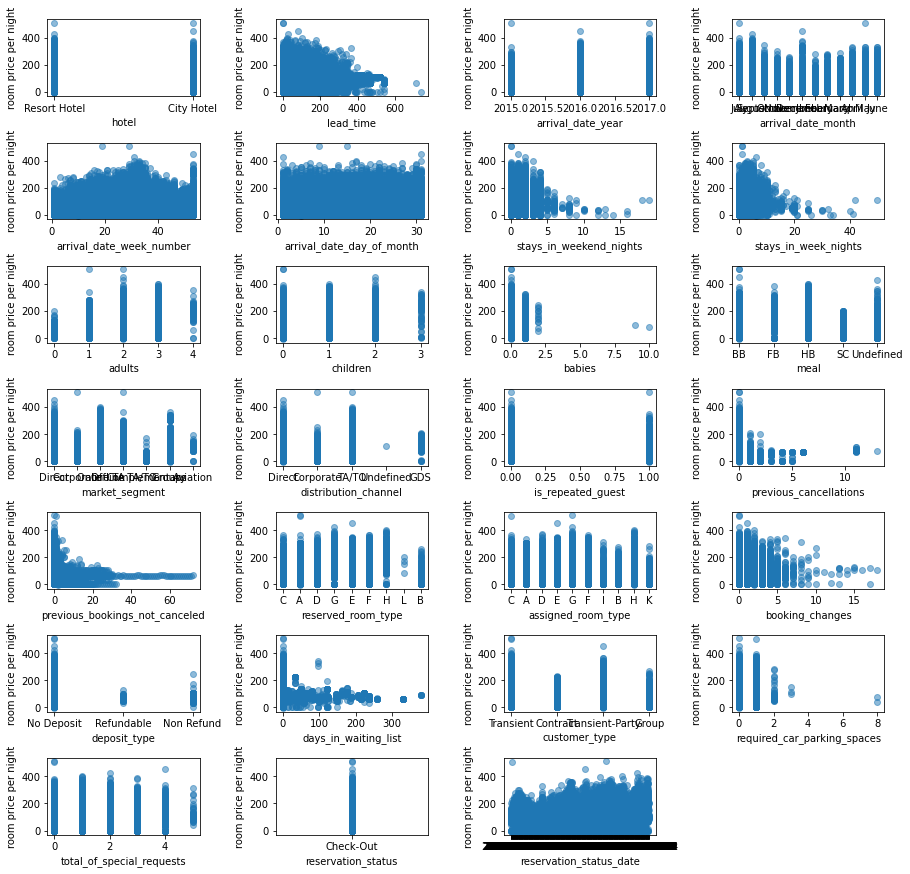

In [97]:
scatterplots(features, ncol=4, figsize=(15, 15))

We check the price per person per night.

In [98]:
## define useful function to create scatterplots of room prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'adr_pp', data=hotel_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='room price per person per night')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

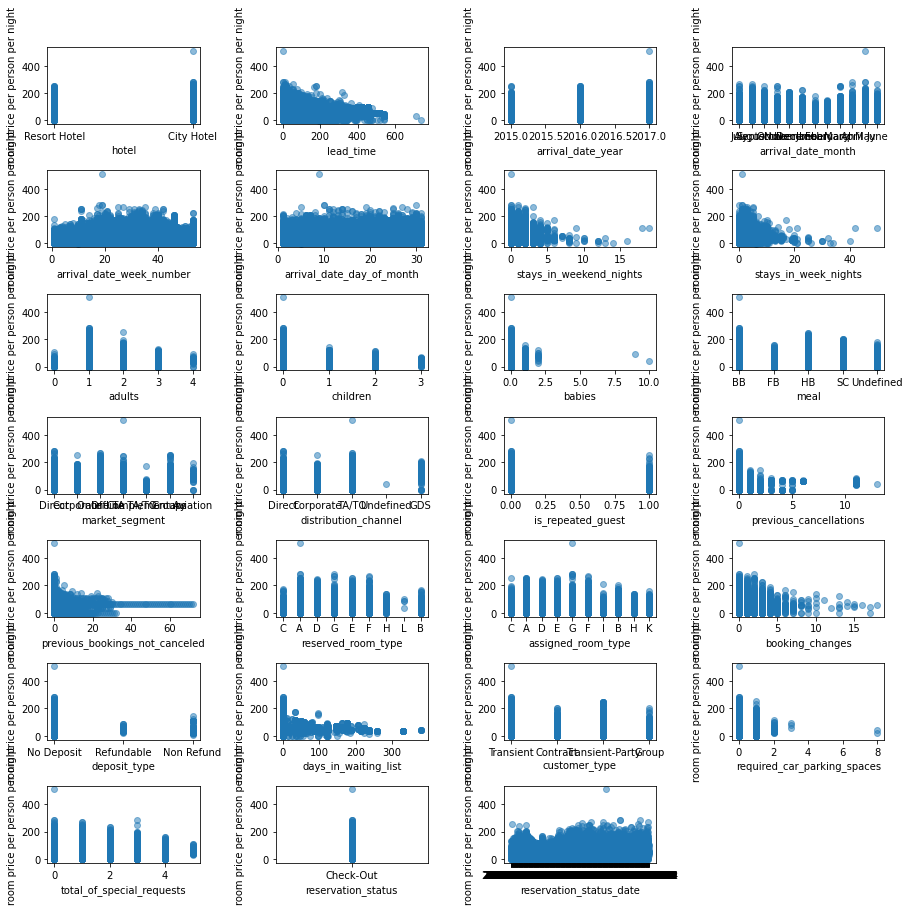

In [99]:
features = [col for col in hotel_data.columns if col not in ['is_canceled','company', 'agent', 'adr', 'adr_pp','country','_merge']]
scatterplots(features, ncol=4, figsize=(15, 15))

There is not too much differences betwee the room price and the room price per person affected by the features.

From the plots we can see the most important features are adults numbers, children numbers, special requests, country, stay length in week days and weekends.

## 3.6 Summary<a id='3.6_Summary'></a>

Summary of the exploratory data analysis:
1. The main purpose of the step is to check and determine the exit and derived features may affect the room price most.
        
2. To check the countries of guest.

3. To use the feature correlation heatmap to check out the relationship between features and the Adults weekend price which our interest of ticket price.
   
       a. The room price competition features are negatively correlated with repeating guests, previous cancelation, previous cancelling days.
       b. We found the room price is more affected by the adults numbers, children numbers, special requests, country, stay length in week days and weekend.


In [100]:
hotel_data.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [101]:
# Save the data 

datapath = '../data'
save_file(hotel_data, 'hotel_data_step3_features.csv', datapath)

Writing file.  "../data/hotel_data_step3_features.csv"
